In [1]:
import numpy as np
import random as rng
import numpy.random as numRand
import optproblems
from optproblems import cec2005
from optproblems import *
import typing 
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [2]:
# mutation functions

# not actually used so I don't haev to comment it ;D
def bitFlip(genotype, flip_probability):
    p = flip_probability
    
    for i in range(len(genotype)):
        if p >= np.random.rand(1, 1):
            genotype[i] = not(genotype[i])
    return genotype
#end

# gaussian convolution
# Add gaussian-distributed random numbers to a random selection of values from the genotype
# variance: variance of the distribution random numbers will be generated from
# min: minimum number genotype's values can be 
# max: maximum number genotype's values can be
# noise_probability: probability that gaussian number will be added a value in the genotype
def gaussianConvolution(genotype, variance, min = -100, max = 100, noise_probability=1):
    p = noise_probability #probability of adding noise to a genotype value
    var = variance        #variance of the gaussian distribution which will be added to a genotype val
    mu = 0                #mean of the normal distribution
    
    for i in range(len(genotype)): #for every genotype member
        # if the noise probability is greater than a random number (between 0 and 1)
        if p >= np.random.rand(1, 1): #a 1x1 array of random numbers (a.k.a a random number)
            #generate a random nnumber from a gaussian distribution
            randy_num = rng.normalvariate(mu, var)
            
            #until (current genotype value + randy_num) is between min and max
            while not (min <= genotype[i] + randy_num <= max):
                randy_num = rng.normalvariate(mu, var)
            #end
            
            genotype[i] = (genotype[i] + randy_num) #update current value from genotype
        #end
    return genotype
#end

mutate_functions = {"bit flip":bitFlip, "g convolve":gaussianConvolution}

In [3]:
# test mutation

pop = np.array([2, 2, 2, 2, 1, 1, 1, 1], dtype="float")
mut_pop = mutate_functions["g convolve"](pop, 5, 0.5)
mut_pop

array([2.24931037, 3.38623247, 0.9790211 , 1.17000996, 1.1214404 ,
       3.75814827, 7.10567996, 2.03179276])

In [4]:
# recombination

# swap values between 2 vectors starting from a random index and ending at another random index
# (index circularly)
# vec_1: a vector
# vec_2: a vector
def twoPtCrossover(vec_1, vec_2):
    #TODO - implement
    vec_3, vec_4 = vec_1, vec_2
    return vec_3, vec_4
#end

#swap values between 2 vectors starting from a random index
#vec_1: a vector
#vec_2: a vector
def onePtCrossover(vec_1, vec_2):
    #TODO handle unequal-length vecs
    #TODO handle empty vecs
    
    # choose a random integer (between bidx and pop length) and
    # swap vector values between that index and the vectors' ends
    cross_beg_idx = int(rng.uniform(0, len(vec_1)))
    
    # if crossover start is greater than first index 
    # (crossing from zero would just output the same 2 vectors in reverse order)
    if cross_beg_idx > 0:
        # swap the values
        for idx in range(cross_beg_idx, len(vec_1)):
            swap = vec_1[idx] #store the value to be swapped
            vec_1[idx] = vec_2[idx]
            vec_2[idx] = swap #swap the value to be swapped
        #end
    #end
    return vec_1, vec_2
#end

recombine_fns = {"1-pt-crossover":onePtCrossover}

In [5]:
# test recombination
pop_1 = [4.0, 3.2, 1.0, 0.5, 6.2]
pop_2 = [10.0, 15.0, 12.2, 9.5, 5.0]

pop_3, pop_4 = onePtCrossover(pop_1, pop_2)

print(pop_3)
pop_4

[4.0, 3.2, 1.0, 0.5, 6.2]


[10.0, 15.0, 12.2, 9.5, 5.0]

In [6]:
#selection

# Assess a genotype's fitness score in relation to a given problem function
# In GA, allows GA to find genotypes with greatest fitness and "naturally select" them
# genotype: a potential solution
# problem: the solution will be assessed on the output it receives when applied to this problem
def assessFitness(genotype, problem):
    if genotype == None:
        fitness = np.inf
    else:
        solution = Individual(genotype)
        problem.evaluate(solution)
        fitness = solution.objective_values
    #end
    
    return fitness
#end

# select the best genotype from the population according to a tournament process
# population: to select individuals from
# tournament_size: size of the group considered for selection
# problem: population members' fitness will be assessed according to their score on this problem
def tournamentSelect(population, tournament_size, problem):
    t = tournament_size
    
    select_idx = int(rng.uniform(0, len(population)))
    best_idx = select_idx
    best = population[select_idx]
    
    # for every population element between second and "tournament size"...
    for i in range(1, len(population)):
        # choose a "next" at random from pop
        select_idx = int(rng.uniform(0, len(population)))
        next = population[select_idx]
        
        # if fitness of Next better than best...
        if assessFitness(next, problem) > assessFitness(best, problem):
            # best = next
            best = next
        #end
    #end
    
    return best
#end

In [18]:
# genetic algorithm
PROBLEM_SIZE = 2

#TODO docs
# generation_limit:
# population_size:
# problem_size:
# problem:
def geneticAlgorithm(generation_limit = 1000, population_size = 10, problem_size = PROBLEM_SIZE, problem = optproblems.Problem(cec2005.F1(PROBLEM_SIZE))):
    # TODO optimise for fitness checks
    # create population
    pop = list()
    for i in range(problem_size):
        pop.append(list(numRand.rand(1, problem_size)[0]))
#         print("Fitness {}: {}".format(i, assessFitness(pop[i], problem)))
    #end
    
    best = None
    fitness = np.inf
    generation = 0
    
    # assess fitnesses and assign best until best is the ideal solution
    while generation < generation_limit:  
        generation += 1
        for idx in range(len(pop)):
            if assessFitness(pop[idx], problem) < assessFitness(best, problem):
                best = pop[idx]
                best_fit = assessFitness(best, problem)
            #end
        #end
        
        # create next generation
        next_gen_pop = list() #Q in the algorithm def
        for i in range(problem_size):
            # select parents
            parent_1 = tournamentSelect(pop, 5, problem)
            parent_2 = tournamentSelect(pop, 5, problem)
            
            # birth some babbies using crossover
            child_1, child_2 = onePtCrossover(parent_1, parent_2)
            
            # next_generation.append(list(numRand.rand(1, problem_size)[0]))
            next_gen_pop.append(mutate_functions["g convolve"](parent_1, 5, 0.5))
            next_gen_pop.append(mutate_functions["g convolve"](parent_2, 5, 0.5))
        #end
        
        pop = next_gen_pop
        
        print(" {}\n {}\n {}\n {}".format(best, best_fit, generation, generation_limit))

    #end
    
    fitness = assessFitness(best, problem)

    print("\nFinally...\n")

    print(" {}\n {}".format(best, fitness))
    
    return fitness
#end



In [19]:
fitness = geneticAlgorithm()

print("\nFitness: {}".format(fitness))

 [5.259676107330245, 8.786470677959535]
 4500.849241409573
 1
 1000
 [2.456502658371633, 11.234434226507258]
 3566.5960880358743
 2
 1000
 [3.2622120675717095, 39.71179420759911]
 1847.8954411517889
 3
 1000
 [14.56508370026698, 49.12352084281996]
 1847.8954411517889
 4
 1000
 [7.852138460401967, 61.57922275165795]
 1847.8954411517889
 5
 1000
 [20.647503506889755, 44.04562824472011]
 1847.8954411517889
 6
 1000
 [33.488559456822124, 45.40618299629012]
 1847.8954411517889
 7
 1000
 [25.08072287359162, 54.24345249634847]
 1847.8954411517889
 8
 1000
 [26.647805236542595, 54.97308031699629]
 1847.8954411517889
 9
 1000
 [9.678928292454579, 32.53783424709662]
 1847.8954411517889
 10
 1000
 [26.870585618817223, 35.20317775060779]
 1847.8954411517889
 11
 1000
 [26.396258930650685, 49.8839741118464]
 1847.8954411517889
 12
 1000
 [13.518850746327619, 35.94788391438047]
 1847.8954411517889
 13
 1000
 [8.287156913253432, 29.46058578571527]
 1847.8954411517889
 14
 1000
 [12.747611124179237, 4

 1000
 [55.94466347945252, 89.0326110280077]
 1847.8954411517889
 312
 1000
 [64.68728472549486, 90.77545682958487]
 1847.8954411517889
 313
 1000
 [70.35173266707136, 84.81870508081555]
 1847.8954411517889
 314
 1000
 [53.520962119192944, 73.33598978669518]
 1847.8954411517889
 315
 1000
 [33.053153105766135, 87.31132122650982]
 1847.8954411517889
 316
 1000
 [9.845878243904432, 89.495666595514]
 1847.8954411517889
 317
 1000
 [31.067947695884992, 88.73099794053793]
 1847.8954411517889
 318
 1000
 [43.42021859238448, 96.98640127703636]
 1847.8954411517889
 319
 1000
 [62.62582235168061, 93.57795885491097]
 1847.8954411517889
 320
 1000
 [59.73251922289245, 93.17688725384798]
 1847.8954411517889
 321
 1000
 [49.33006847589442, 86.46880375754029]
 1847.8954411517889
 322
 1000
 [44.90909264585022, 84.67530978125383]
 1847.8954411517889
 323
 1000
 [54.47874635569688, 87.49425485970494]
 1847.8954411517889
 324
 1000
 [49.89527275232494, 96.93300223936075]
 1847.8954411517889
 325
 1000


 1000
 [52.955197053129965, 34.13351859880577]
 1847.8954411517889
 571
 1000
 [37.78966526792573, 36.360595967183045]
 1847.8954411517889
 572
 1000
 [38.454944670012075, 39.0544830892678]
 1847.8954411517889
 573
 1000
 [46.11855507406797, 38.24840571265747]
 1847.8954411517889
 574
 1000
 [58.4799315711994, 39.56023045374186]
 1847.8954411517889
 575
 1000
 [73.90192810832198, 48.76221421024755]
 1847.8954411517889
 576
 1000
 [69.29885976294295, 45.661045863936515]
 1847.8954411517889
 577
 1000
 [72.81080036040544, 49.06831150414683]
 1847.8954411517889
 578
 1000
 [68.75611838874141, 33.17328933135937]
 1847.8954411517889
 579
 1000
 [75.68539550987104, 32.50459623057225]
 1847.8954411517889
 580
 1000
 [85.30848375860987, 34.109884164341004]
 1847.8954411517889
 581
 1000
 [60.52196515068637, 36.51040013866843]
 1847.8954411517889
 582
 1000
 [55.27455322736253, 33.116325974250444]
 1847.8954411517889
 583
 1000
 [60.50041908499229, 43.60779140453316]
 1847.8954411517889
 584
 1

 1000
 [12.0468460553483, 22.258507836575042]
 1847.8954411517889
 799
 1000
 [7.3928447097720245, 20.706800283704997]
 1847.8954411517889
 800
 1000
 [28.986714170923204, 24.361986518419037]
 1847.8954411517889
 801
 1000
 [18.56156282132745, 4.8336147645479945]
 1847.8954411517889
 802
 1000
 [17.362546121894106, 17.332086890981074]
 1847.8954411517889
 803
 1000
 [27.703143145690145, 45.9525829061719]
 1847.8954411517889
 804
 1000
 [29.67016002542232, 33.20649849269124]
 1847.8954411517889
 805
 1000
 [27.388765727675597, 28.571695264472467]
 1847.8954411517889
 806
 1000
 [20.21418013585329, 18.598771907172534]
 1847.8954411517889
 807
 1000
 [27.692146055858434, 15.763411344087698]
 1847.8954411517889
 808
 1000
 [42.512811727150726, 15.380823212809013]
 1847.8954411517889
 809
 1000
 [31.523312854997293, 17.682864711647277]
 1847.8954411517889
 810
 1000
 [23.505874178655695, 27.47542366310978]
 1847.8954411517889
 811
 1000
 [34.758419184292656, 34.14643955980357]
 1847.8954411

In [9]:
genotype1 = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
genotype2 = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

PROBLEM_LENGTH = 10
problem = optproblems.Problem(cec2005.F1(PROBLEM_LENGTH))
solution = Individual(genotype2)
problem.evaluate(solution)
fitness = solution.objective_values

fitness

30650.544875309995

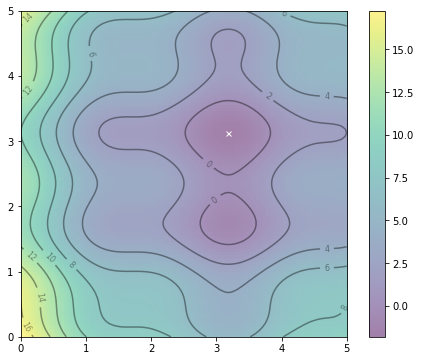

In [10]:
# Not actually our code
# This is an example from [link] ad completely irrelevant to our solution
import numpy as np
import matplotlib.pyplot as plt
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
 
# Contour plot: With the global minimum showed as "X" on the plot
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

n_particles = 20
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

c1 = c2 = 0.1
w = 0.8
# One iteration
r = np.random.rand(2)
V = w * V + c1*r[0]*(pbest - X) + c2*r[1]*(gbest.reshape(-1,1)-X)
X = X + V
obj = f(X[0], X[1])
pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

In [11]:
def snipAThing(thing):
#     thing = np.array(thing)
    thing = np.delete(thing, 4)
#end

thang = np.array([7, 6, 5, 4, 3, 2, 1, 0]) 

snipAThing(thang)

thang

array([7, 6, 5, 4, 3, 2, 1, 0])